# Basic Statistics

Topics Covered:
- Statistics vs parameters (population vs sample)
- Obtaining data (Observational vs Experimental)
- Sampling Data
  - Random Sampling - they don't describe what sampling bias is very well (chose sample incorrectly isnt a great explanation - confounding factors are better explained).
  - unequal probability sampling (totally random sampling can reduce the voice of the minority and give an innacurrate picture, so sometimes you need to sample more from smaller groups to get a picture - employee satisfaction is a good example)
- How do we measure Statistics?
  - Measures of Center
    - mean
    - median
  - Measures of Variation
    - range
    - standard deviation
    - coefficient of variation (useful for comparing acros datasets, only for ratio level data)
- Correlations in data
  - Correlation coefficients
- The Empirical Rule

**Population** is the entire pool of subjects of an experiment or model. A **parameter** is a numerical measure of a characteristic of a population. **Sample** is a subject of a population, a **statistic** is a numerical measurement describing a characteristic of a sample of a popoulation.

In the first experiment we do an A/B testing example where we have a list of tuples with the version as the first tuple and whether the customer bought as the second tuple. We don't have the data so I will have to generate it below. They state the total number of people exposed to any website was 346.

In [8]:
import random

#produces a random 'A' 'B'
def int_to_AB(binary_int):
    if binary_int == 0:
        return 'A'
    else:
        return'B'

results=[]

sample_size =range(0, 346)

#generates each pair [website, conversion] randomly and adds to list
for sample in sample_size:
    results.append([int_to_AB(random.randint(0,1)), random.randint(0,1)])

print(random.randint(0,1))
print(random.randint(0,1))

print(results)

1
0
[['B', 1], ['A', 1], ['A', 0], ['B', 1], ['A', 0], ['B', 0], ['B', 1], ['B', 1], ['B', 0], ['A', 0], ['B', 1], ['A', 0], ['A', 1], ['A', 1], ['B', 1], ['A', 0], ['B', 0], ['A', 0], ['A', 1], ['B', 0], ['B', 1], ['A', 1], ['A', 0], ['B', 1], ['A', 1], ['A', 1], ['B', 0], ['A', 1], ['B', 0], ['B', 1], ['A', 1], ['A', 1], ['A', 0], ['B', 1], ['B', 1], ['B', 1], ['B', 1], ['A', 1], ['B', 1], ['A', 0], ['B', 1], ['A', 1], ['A', 0], ['A', 1], ['B', 1], ['B', 1], ['A', 0], ['B', 0], ['B', 0], ['A', 0], ['A', 1], ['A', 0], ['B', 1], ['A', 1], ['B', 0], ['A', 0], ['A', 0], ['B', 0], ['B', 0], ['B', 0], ['B', 0], ['B', 0], ['B', 1], ['B', 1], ['A', 0], ['B', 0], ['A', 1], ['B', 1], ['B', 0], ['B', 1], ['B', 0], ['A', 1], ['B', 1], ['A', 0], ['B', 1], ['A', 1], ['A', 1], ['B', 0], ['B', 0], ['A', 0], ['B', 0], ['B', 1], ['A', 0], ['A', 0], ['B', 0], ['A', 0], ['A', 0], ['B', 0], ['A', 1], ['A', 0], ['B', 0], ['A', 0], ['A', 1], ['B', 1], ['A', 0], ['A', 0], ['B', 1], ['A', 0], ['A', 1], ['A',

In [9]:
users_exposed_to_A= []
users_exposed_to_B= []
#two lists to hold the results of each individual website

for [website, converted] in results:
    if website == 'A':
        users_exposed_to_A.append(converted)
    elif website == 'B':
        users_exposed_to_B.append(converted)
#very cool, I just tried this form of looping, but surpri
        
print(len(users_exposed_to_A))
print(len(users_exposed_to_B))

171
175


In [10]:
print(sum(users_exposed_to_A))

74


In [11]:
print(sum(users_exposed_to_B))

91


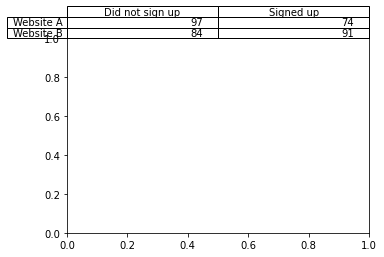

In [25]:
import numpy as np
from matplotlib import pyplot as plt

table_data = [[len(users_exposed_to_A) - sum(users_exposed_to_A), sum(users_exposed_to_A)],
              [len(users_exposed_to_B) - sum(users_exposed_to_B), sum(users_exposed_to_B)]]

columns = ('Did not sign up', 'Signed up')
rows = ('Website A', 'Website B')

# Add a table at the bottom of the axes
the_table = plt.table(cellText=table_data,rowLabels=rows, colLabels=columns, loc = 'top')
plt.subplots_adjust(left=0.2, top = 0.8) #make room for table
plt.show()
#need to find a better way to do all this!!!!

In [26]:
#conversions for website A
print('Conversion rate for Website A: ' + str(74/(94+74)))
print('Conversion rate for Website B: ' + str(91/(84+91)))

Conversions for Website A: 0.44047619047619047
Conversions for Website B: 0.52


From above it appears that our website B increases the conversion rate quite significantly, however, to truly test significant, we will need use hypothesis testing.

In [29]:
np.mean([11, 15, 17, 14])

14.25

In [30]:
np.mean([11, 15, 17, 14, 31])

17.6

In [31]:
np.median([11, 15, 17, 14])

14.5

In [32]:
np.median([11, 15, 17, 14, 31])

15.0

As we can see above, the median is less sensitive to outliers

In [33]:
#consider sample of 24 friends on Facebook and how many friends they have
friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 
           125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 742, 621]
print(np.mean(friends))

789.0833333333334


In [34]:
print(np.median(friends))

769.5


Above, both the median and the mean are high, but there are a few outliers which are not well described by this mean. We need some way to describe how spread out this data is - measure of variation!

In [35]:
#range
print(np.max(friends) - np.min(friends))

1684


In [36]:
np.std(friends)

425.1862255399261

range(0, 24)


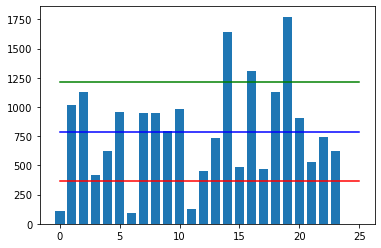

In [41]:
y_pos = range(len(friends))
print(y_pos)
plt.bar(y_pos, friends) #draws bar chart with y_pos being the x values, friends being the y values
#plots lines from 0-25 x coordinate, (y1, y2) in y coordinate y1=y2, so straight line, 'b-' means blue
plt.plot((0,25), (789, 789), 'b-')
plt.plot((0,25), (789+425, 789+425), 'g-')

plt.plot((0,25), (789-425, 789-425), 'r-')

<BarContainer object of 24 artists>

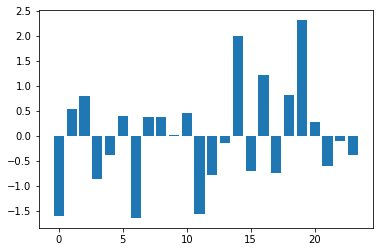

In [42]:
z_scores = []
m = np.mean(friends) #average friends on fb
s = np.std(friends) #standard deviation friends on FB

for friend in friends:
    z = (friend-m)/s #z score
    z_scores.append(z) #make a list of the scores for plotting
    
plt.bar(y_pos, z_scores)

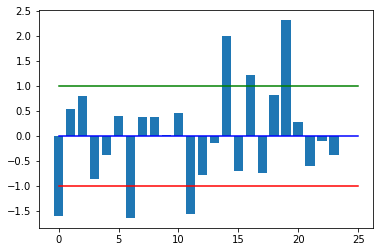

In [43]:
plt.bar(y_pos, z_scores)
plt.plot((0, 25), (1, 1), 'g-')
plt.plot((0, 25), (0, 0), 'b-')
plt.plot((0, 25), (-1,-1), 'r-')

In [47]:
happiness = [.8, .6, .3, .6, .6, .4, .8, .5, .4, .3, .3, .6, .2, .8,
            1, .6, .2, .7, .5, .3, .1, 0, .3, 1]

import pandas as pd

df = pd.DataFrame({'friends': friends, 'happiness': happiness}) #make dataframe with columns friends and happiness
df.head()

,friends,happiness
0,109,0.8
1,1017,0.6
2,1127,0.3
3,418,0.6
4,625,0.6


In [49]:
#in some machine-learning/statistical modeling, we need to standardize scales, so lets use a package from scikit-learn
from sklearn import preprocessing

df_scaled = pd.DataFrame(preprocessing.scale(df), columns = ['friends_scaled', 'happiness_scaled'])

df_scaled.head()

,friends_scaled,happiness_scaled
0,-1.599495,1.153223
1,0.536040,0.394939
2,0.794750,-0.742486
3,-0.872755,0.394939
4,-0.385909,0.394939


Note that the preprocessing is doing the following things separately for each column:
- Finding the mean of the column
- Finding the standard deviation of the column
- Applying the z-score function to each element in the column

<AxesSubplot:xlabel='friends_scaled', ylabel='happiness_scaled'>

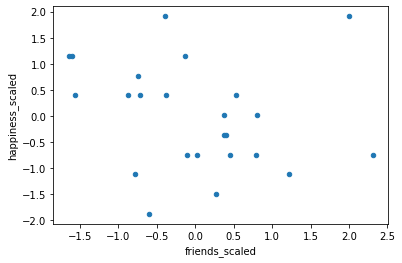

In [50]:
df_scaled.plot(kind='scatter', x='friends_scaled', y='happiness_scaled')

Many machine learning algorithms require this type of scaling for model optimization

In [51]:
df.corr()

,friends,happiness
friends,1.000000,-0.216199
happiness,-0.216199,1.000000


Caution, correlation coefficients measure linear relationship, relationship may be nonlinear even if a linear relationship doesn't exist.

In [54]:
#finding th epercentage of people within one standard deviation of the mean
within_1_std = df_scaled[(df_scaled['friends_scaled'] <=1) & (df_scaled['friends_scaled']>=-1)].shape[0]
within_1_std /float(df_scaled.shape[0])

0.75

In [57]:
#2 std
within_2_std = df_scaled[(df_scaled['friends_scaled'] <=2) & (df_scaled['friends_scaled']>=-2)].shape[0]
within_2_std /float(df_scaled.shape[0])

0.9166666666666666

In [56]:
3 std
within_3_std = df_scaled[(df_scaled['friends_scaled'] <=3) & (df_scaled['friends_scaled']>=-3)].shape[0]
within_3_std /float(df_scaled.shape[0])

1.0